# Predict the type of cars based on numerous features

In [149]:
import pandas as pd
A=pd.read_csv("C:/Users/Neha/Downloads/PythonNotes/Cars93.csv")

In [150]:
A

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [151]:
A=A.drop(labels=['Unnamed: 0'],axis=1)

In [152]:
A=A.rename(columns={'Min.Price':'MinPrice','Max.Price':'MaxPrice','MPG.city':'MPGCity','MPG.highway':'MPGHighway','Turn.circle':'TurnCircle','Rear.seat.room':'RearSeatRoom','Luggage.room':'LuggageRoom','Fuel.tank.capacity':'FuelTankCapacity','Rev.per.mile':'RevPerMile'})

# Data Profiling

In [153]:
A.head()

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGCity,MPGHighway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,TurnCircle,RearSeatRoom,LuggageRoom,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [154]:

A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      93 non-null     object 
 1   Model             93 non-null     object 
 2   Type              93 non-null     object 
 3   MinPrice          93 non-null     float64
 4   Price             93 non-null     float64
 5   MaxPrice          93 non-null     float64
 6   MPGCity           93 non-null     int64  
 7   MPGHighway        93 non-null     int64  
 8   AirBags           89 non-null     object 
 9   DriveTrain        93 non-null     object 
 10  Cylinders         93 non-null     object 
 11  EngineSize        93 non-null     float64
 12  Horsepower        93 non-null     int64  
 13  RPM               93 non-null     int64  
 14  RevPerMile        93 non-null     int64  
 15  Man.trans.avail   93 non-null     object 
 16  FuelTankCapacity  93 non-null     float64
 17 

# Seperation of Categorical and continous columns

In [155]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtype=='object'):
        cat.append(i)
    else:
        con.append(i)

In [156]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [157]:
con

['MinPrice',
 'Price',
 'MaxPrice',
 'MPGCity',
 'MPGHighway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'RevPerMile',
 'FuelTankCapacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'TurnCircle',
 'RearSeatRoom',
 'LuggageRoom',
 'Weight']

In [158]:
A.isna().sum()

Manufacturer         0
Model                0
Type                 0
MinPrice             0
Price                0
MaxPrice             0
MPGCity              0
MPGHighway           0
AirBags              4
DriveTrain           0
Cylinders            0
EngineSize           0
Horsepower           0
RPM                  0
RevPerMile           0
Man.trans.avail      0
FuelTankCapacity     0
Passengers           0
Length               0
Wheelbase            0
Width                0
TurnCircle           0
RearSeatRoom         2
LuggageRoom         11
Weight               0
Origin               0
Make                 0
dtype: int64

<AxesSubplot:>

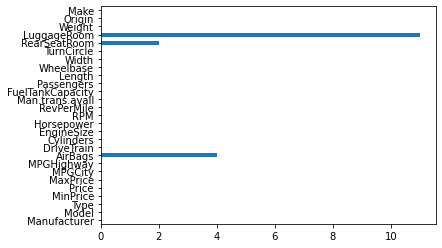

In [159]:
A.isna().sum().plot(kind='barh')

In [160]:
!pip install missingno


<AxesSubplot:>

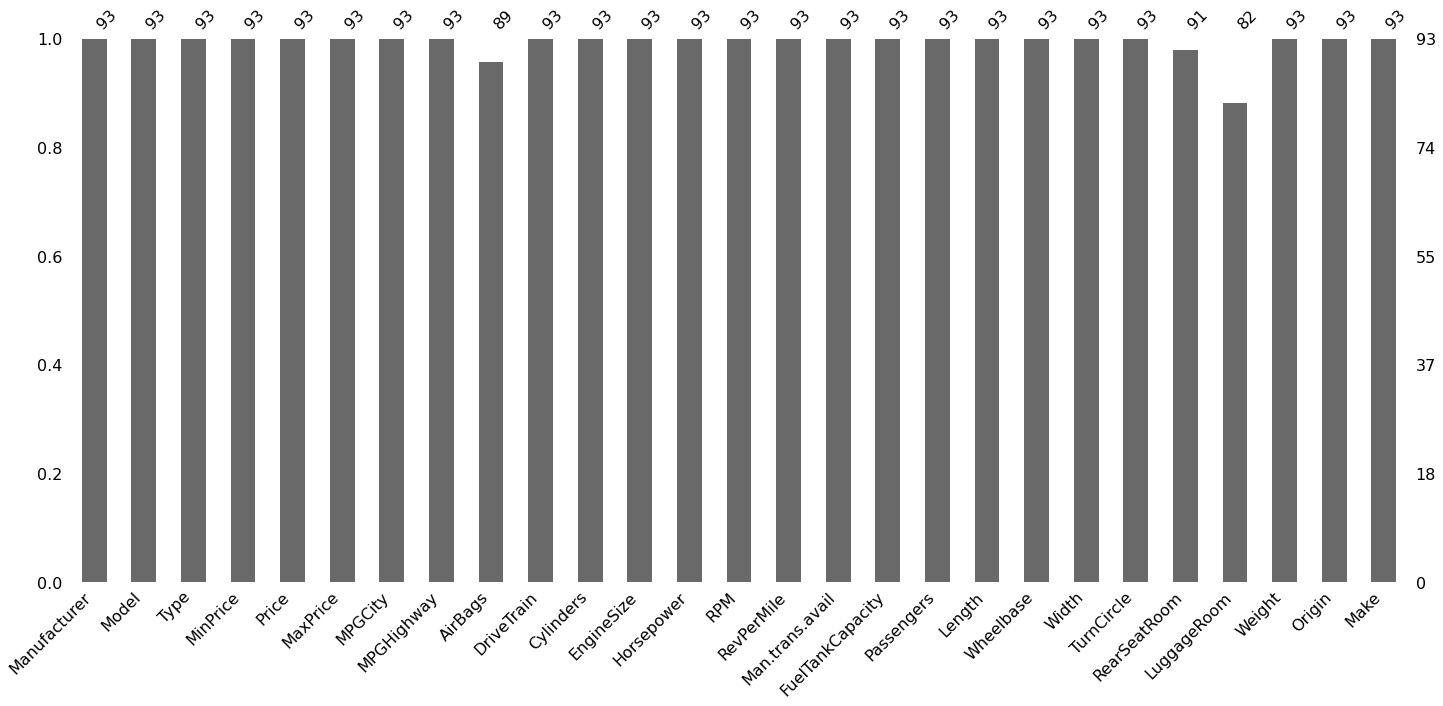

In [161]:
import missingno as mno
mno.bar(A)

# Data preprocessing

# Missing Data Treatment

In [162]:
CAT=[]
CON=[]
def MDI(Df):
    Q=pd.DataFrame(Df.isna().sum(),columns=['A'])
    for i in list(Q[Q.A>0].index):
        if(Df[i].dtype=='object'):
            CAT.append(i)
        else:
            CON.append(i)
    return CAT,CON

In [163]:
MDI(A)

(['AirBags'], ['RearSeatRoom', 'LuggageRoom'])

In [164]:
def MDT(Df):
    x,y=MDI(Df)
    for i in x:
        replacer=Df[i].mode()[0]
        Df[i]=Df[i].fillna(replacer)
    for i in y:
        replacer=Df[i].mean()
        Df[i]=Df[i].fillna(replacer
                          
                          )

In [165]:
MDT(A)

In [166]:
A.isna().sum()

Manufacturer        0
Model               0
Type                0
MinPrice            0
Price               0
MaxPrice            0
MPGCity             0
MPGHighway          0
AirBags             0
DriveTrain          0
Cylinders           0
EngineSize          0
Horsepower          0
RPM                 0
RevPerMile          0
Man.trans.avail     0
FuelTankCapacity    0
Passengers          0
Length              0
Wheelbase           0
Width               0
TurnCircle          0
RearSeatRoom        0
LuggageRoom         0
Weight              0
Origin              0
Make                0
dtype: int64

# Exploratory Data Analysis

# Anova test

In [167]:
def Anova(CON,CAT,Df):
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel=CON+"~"+CAT
    model=ols(rel,Df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_result=anova_lm(model)
    Q=pd.DataFrame(anova_result)
    a=Q['PR(>F)'][CAT]
    print("%.40f"%a)

In [168]:
for i in range(0,18,1):
    Anova(con[i],'Type',A)

0.0000000009496409728694488264362898798467
0.0000000147699903566454386534008137677951
0.0000005752601789771194083116575418435090
0.0000000000000000750062896680411680675847
0.0000000000000039069324382921123122732209
0.0000000000000014412134884119417117861710
0.0000000292957711821544811724559728228004
0.0000105634409769784508889393925823441123
0.0000000000039136151649453051000142402191
0.0000000000000000003369431288156979073606
0.0000000000000000000000000081531749096924
0.0000000000000000000234706085290620822493
0.0000000000000000000000000000007329357828
0.0000000000000000000094881466335669683987
0.0000000000000010526143379797449388940725
0.0000000000000081051616029232785582484326
0.0000000000014339915397164089545961545556
0.0000000000000000000000000177828559166938


# Boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


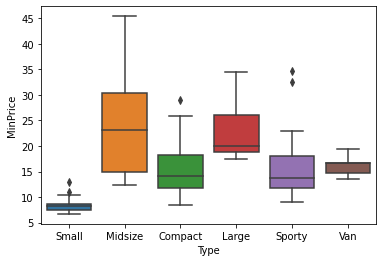

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


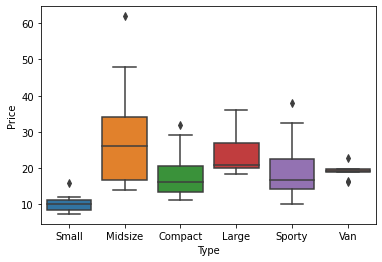

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


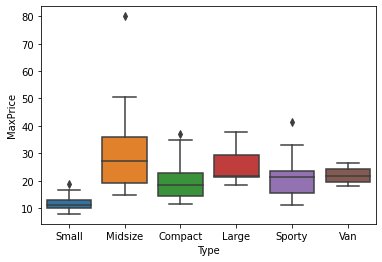

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


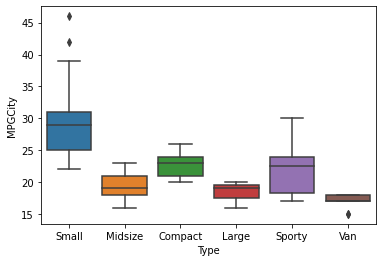

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


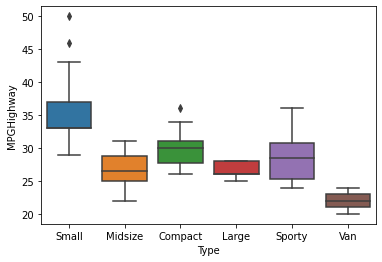

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


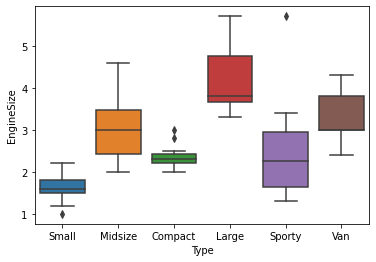

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


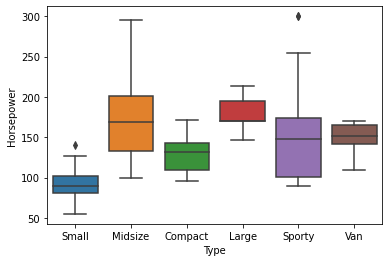

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


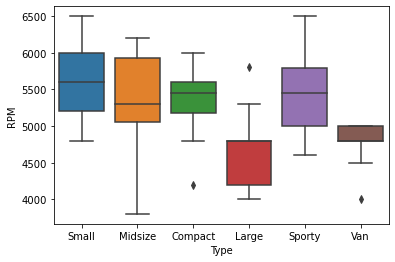

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


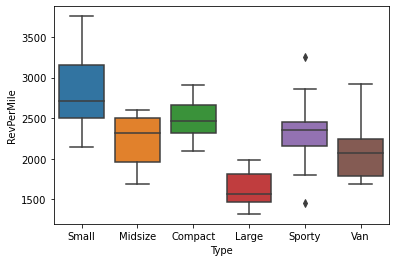

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


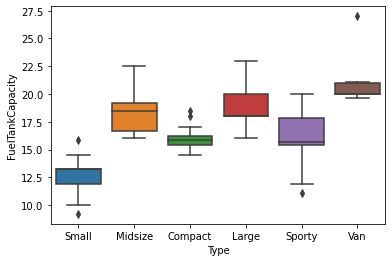

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


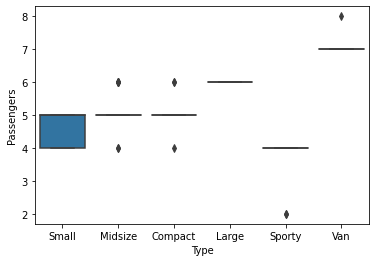

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


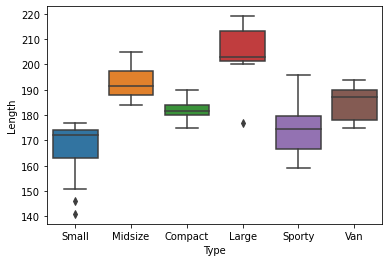

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


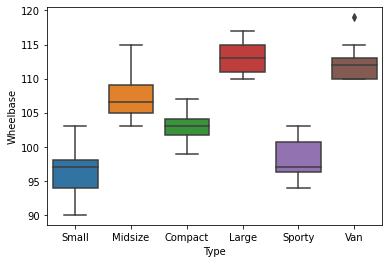

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


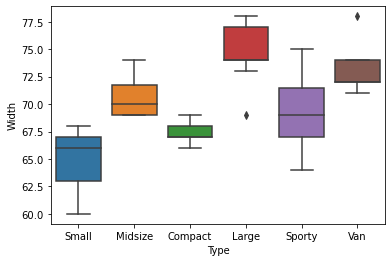

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


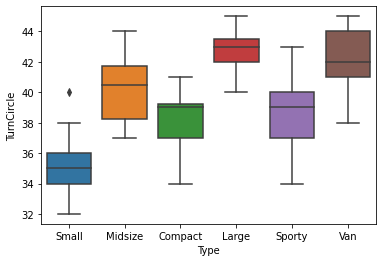

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


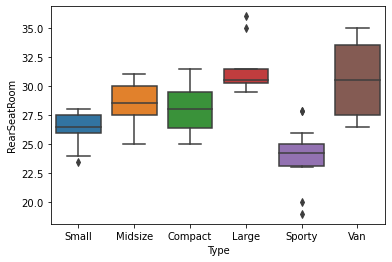

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


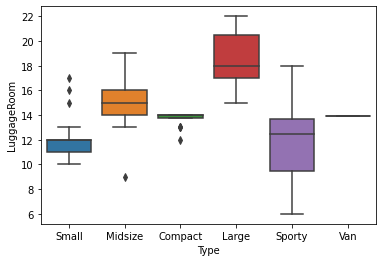

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


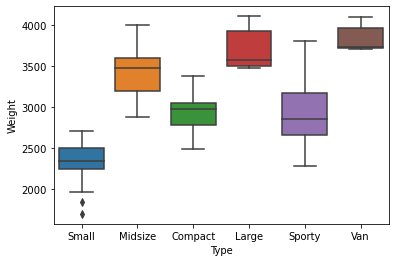

In [169]:
import matplotlib.pyplot as plt
import seaborn as sb
for i in con:
    sb.boxplot(A.Type,A[i])
    plt.show()


# Counplot with hue

In [170]:
cat.remove('Manufacturer')
cat.remove('Model')
cat.remove('Make')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


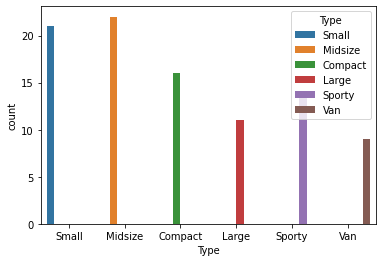

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


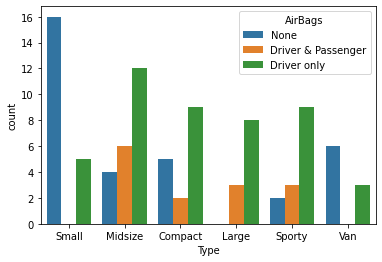

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


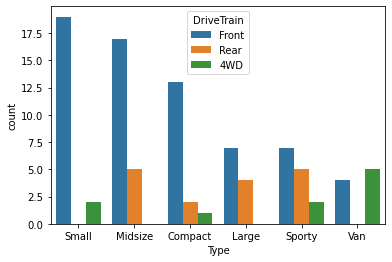

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


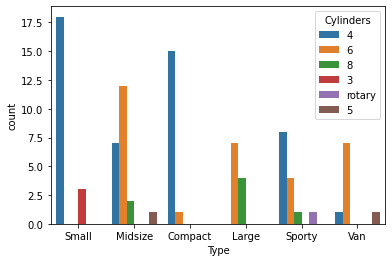

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


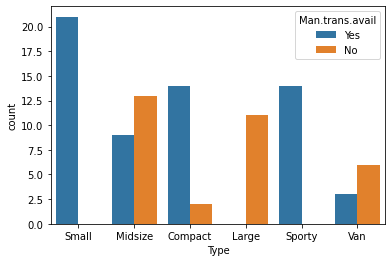

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


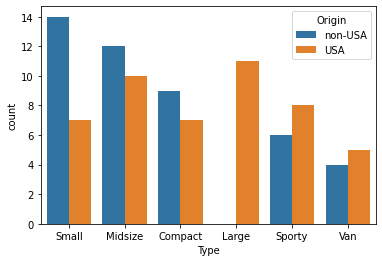

In [171]:
for i in cat:
    sb.countplot(A.Type,hue=A[i])
    plt.show()

# Convert Categorical input to numerical nature

# Multinomial Logistic Regression

# Training Error

In [175]:
cat.remove('Type')
Y=A[['Type']]
X=A[con].join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=11)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtrain)

from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(ytrain,pred))

0.6081081081081081


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Testing Error

In [176]:
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(ytest,pred))

0.631578947368421


# Decision Tree Classifier

In [177]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=20)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8947368421052632

# Pruning
Pre-pruning

# Minimum samples split

In [178]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=20,min_samples_split=3)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8947368421052632

# Tuning

In [179]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier(random_state=20)
tp={'min_samples_split':range(2,20,1)}
cv=GridSearchCV(dtc,tp,scoring="accuracy",cv=3)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 2}

In [180]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=20,min_samples_split=10)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8947368421052632

# Minimum Samples leaf

In [181]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=20,min_samples_leaf=4)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.7894736842105263

# Tuning

In [182]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier(random_state=20)
tp={'min_samples_leaf':range(2,20,1)}
cv=GridSearchCV(dtc,tp,scoring="accuracy",cv=3)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 3}

In [183]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=20,min_samples_leaf=3)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.7894736842105263

# Post Pruning

# Max Depth

In [184]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=20,max_depth=4)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8947368421052632

# Tuning

In [185]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier(random_state=20)
tp={'max_depth':range(2,20,1)}
cv=GridSearchCV(dtc,tp,scoring="accuracy",cv=3)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 5}

In [186]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=20,max_depth=5)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8947368421052632

here decision tree classifier using pre pruning (min samples split) giving the better accuracy i.e 0.8947368421052632 as comapred to multinomial logistic regression

# Random Forest classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=20,n_estimators=30)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

<ipython-input-187-c2cff4d153c0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rfc.fit(xtrain,ytrain)


0.9473684210526315

# Pruning

# Pre-Pruning

Min samples split

In [188]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=20,n_estimators=30,min_samples_split=3)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

<ipython-input-188-b8a322196ccf>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rfc.fit(xtrain,ytrain)


0.9473684210526315

# Tuning

In [189]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=20)
tp={'min_samples_split':range(2,20,1)}
cv=GridSearchCV(rfc,tp,scoring="accuracy",cv=3)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

{'min_samples_split': 7}

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=20,n_estimators=30,min_samples_split=4)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

<ipython-input-135-958d67971322>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rfc.fit(xtrain,ytrain)


0.9473684210526315

Min samples leaf

In [136]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=20,n_estimators=30,min_samples_leaf=3)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

<ipython-input-136-756a087e9b04>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rfc.fit(xtrain,ytrain)


0.8421052631578947

# Tuning

In [137]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=20)
tp={'min_samples_leaf':range(2,20,1)}
cv=GridSearchCV(rfc,tp,scoring="accuracy",cv=3)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

{'min_samples_leaf': 3}

In [190]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=20,n_estimators=30,min_samples_leaf=3)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

<ipython-input-190-756a087e9b04>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rfc.fit(xtrain,ytrain)


0.8947368421052632

Max depth

In [191]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=20,n_estimators=30,max_depth=3)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

<ipython-input-191-ea46078bd696>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rfc.fit(xtrain,ytrain)


0.8947368421052632

In [192]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=20)
tp={'max_depth':range(2,20,1)}
cv=GridSearchCV(rfc,tp,scoring="accuracy",cv=3)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

{'max_depth': 5}

In [193]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=20,n_estimators=30,max_depth=5)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

<ipython-input-193-2cd9b8cfef55>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rfc.fit(xtrain,ytrain)


0.9473684210526315

here Random forest giving the good accuracy as compared to multinomial logistic regression and decsion tree classifier.
Highest accuracy till now is 0.9473684210526315

# Ada Boost Classifier

In [194]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=30)
model=abc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6842105263157895

# KNN Classifiers

# Standardization

In [195]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Q = pd.DataFrame(ss.fit_transform(A[con]),columns=con)

In [196]:
X=Q.join(pd.get_dummies(A[cat]))

In [197]:
X

,MinPrice,Price,MaxPrice,MPGCity,MPGHighway,EngineSize,Horsepower,RPM,RevPerMile,FuelTankCapacity,...,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_No,Man.trans.avail_Yes,Origin_USA,Origin_non-USA
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0,1,0,0,0,0,0,1,0,1
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0,0,0,1,0,0,0,1,0,1
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0,0,0,1,0,0,0,1,0,1
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0,0,0,1,0,0,0,1,0,1
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,...,0,0,1,0,0,0,0,1,0,1
89,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,...,0,1,0,0,0,0,0,1,0,1
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,0,0,0,1,0,0,0,1,0,1
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0,1,0,0,0,0,0,1,0,1


In [198]:
from sklearn.neighbors import KNeighborsClassifier
km=KNeighborsClassifier(n_neighbors=5)
model=km.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)


<ipython-input-198-168c56393515>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=km.fit(xtrain,ytrain)


0.6842105263157895

In [199]:
for i in range(2,20,1):
    from sklearn.neighbors import KNeighborsClassifier
    km=KNeighborsClassifier(n_neighbors=i)
    model=km.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    from sklearn.metrics import accuracy_score
    print(i,accuracy_score(ytest,pred))


<ipython-input-199-90ad45bbdd16>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=km.fit(xtrain,ytrain)
<ipython-input-199-90ad45bbdd16>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=km.fit(xtrain,ytrain)
<ipython-input-199-90ad45bbdd16>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=km.fit(xtrain,ytrain)
<ipython-input-199-90ad45bbdd16>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=km.fit(xtrain,ytrain)
<ipython-input-199-90ad45bbdd16>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expe

2 0.47368421052631576
3 0.5263157894736842
4 0.6842105263157895
5 0.6842105263157895
6 0.6842105263157895
7 0.6842105263157895
8 0.5789473684210527
9 0.5789473684210527
10 0.631578947368421
11 0.5789473684210527
12 0.5263157894736842
13 0.5263157894736842
14 0.5789473684210527
15 0.631578947368421
16 0.5789473684210527
17 0.5789473684210527
18 0.631578947368421
19 0.631578947368421


<ipython-input-199-90ad45bbdd16>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=km.fit(xtrain,ytrain)
<ipython-input-199-90ad45bbdd16>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=km.fit(xtrain,ytrain)
